In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.feature_extraction import FeatureHasher
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
def report(test_Y, pred_Y):
    print("accuracy_score:")
    print(metrics.accuracy_score(test_Y, pred_Y))
    print("f1_score:")
    print(metrics.f1_score(test_Y, pred_Y))
    print("recall_score:")
    print(metrics.recall_score(test_Y, pred_Y))
    print("precision_score:")
    print(metrics.precision_score(test_Y, pred_Y))
    print("confusion_matrix:")
    print(metrics.confusion_matrix(test_Y, pred_Y))
    print("AUC:")
    print(metrics.roc_auc_score(test_Y, pred_Y))

    f_pos, t_pos, thresh = metrics.roc_curve(test_Y, pred_Y)
    auc_area = metrics.auc(f_pos, t_pos)
    plt.plot(f_pos, t_pos, 'darkorange', lw=2, label='AUC = %.2f' % auc_area)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title('ROC')
    plt.ylabel('True Pos Rate')
    plt.xlabel('False Pos Rate')
    plt.show()

# 3.1　常见性能衡量指标
## 3.1.1 准确率、召回率、F1值

In [8]:
x, y = datasets.make_classification(n_samples=1000, n_features=100,n_redundant=0, random_state = 1)
train_X, test_X, train_Y, test_Y = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=66)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_Y)
pred_Y = knn.predict(test_X)

accuracy_score:
0.695
f1_score:
0.6934673366834171
recall_score:
0.6571428571428571
precision_score:
0.7340425531914894
confusion_matrix:
[[70 25]
 [36 69]]
AUC:
0.6969924812030075


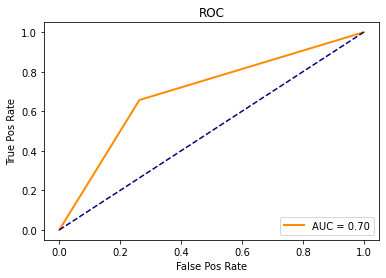

In [11]:
knn_report = report(test_Y, pred_Y)

# 3.2　集成学习

## 3.2.1　Boosting算法

accuracy_score:
0.805
f1_score:
0.8151658767772513
recall_score:
0.819047619047619
precision_score:
0.8113207547169812
confusion_matrix:
[[75 20]
 [19 86]]
AUC:
0.8042606516290727


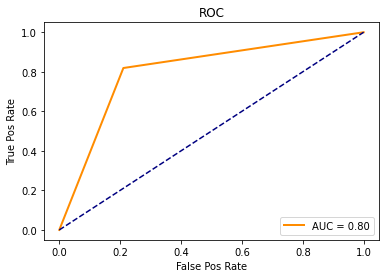

In [12]:
def func2():
    x, y = datasets.make_classification(n_samples=1000, n_features=100,n_redundant=0, random_state = 1)
    train_X, test_X, train_Y, test_Y = train_test_split(x,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=66)
    clf = AdaBoostClassifier(n_estimators=100)
    clf.fit(train_X, train_Y)
    pred_Y = clf.predict(test_X)
    report(test_Y, pred_Y)
func2()

accuracy_score:
0.81
f1_score:
0.8155339805825242
recall_score:
0.8
precision_score:
0.8316831683168316
confusion_matrix:
[[78 17]
 [21 84]]
AUC:
0.8105263157894738


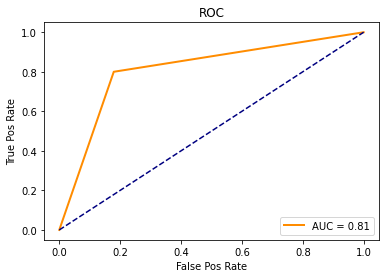

In [13]:
def func3():
    x, y = datasets.make_classification(n_samples=1000, n_features=100,n_redundant=0, random_state = 1)
    train_X, test_X, train_Y, test_Y = train_test_split(x,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=66)
    clf = GradientBoostingClassifier(n_estimators=100)
    clf.fit(train_X, train_Y)
    pred_Y = clf.predict(test_X)
    report(test_Y, pred_Y)
func3()

## 3.2.2　Bagging算法

accuracy_score:
0.83
f1_score:
0.8380952380952381
recall_score:
0.8380952380952381
precision_score:
0.8380952380952381
confusion_matrix:
[[78 17]
 [17 88]]
AUC:
0.8295739348370927


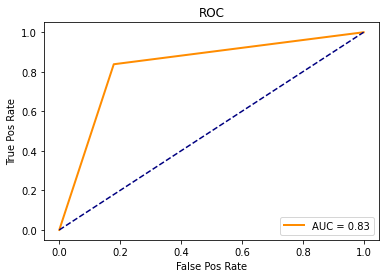

In [14]:
def func4():
    x, y = datasets.make_classification(n_samples=1000, n_features=100,n_redundant=0, random_state = 1)
    train_X, test_X, train_Y, test_Y = train_test_split(x,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=66)
    clf = BaggingClassifier(n_estimators=100)
    clf.fit(train_X, train_Y)
    pred_Y = clf.predict(test_X)
    report(test_Y, pred_Y)
func4()